In [1]:
import csv
import pandas as pd
import numpy as np
import warnings
import llvmlite




warnings.filterwarnings('ignore')

In [2]:

x = "MoH_Vote_Data_Long_Sorted_CLEAN.csv"
df = pd.read_csv(x)
df = df.drop('MODELING_GROUP',1)
df.head()

,person,Year,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,...,sex_male,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use
0,4,2012,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,...,1,0,0,0,0,0,1,1,0,0.727
1,4,2014,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0.727
2,4,2016,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,...,1,0,0,0,0,0,1,1,0,0.727
3,4,2018,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,...,1,0,0,0,0,0,1,1,0,0.727
4,10,2012,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,...,1,0,1,0,0,0,0,1,0,0.086


In [3]:
df_trial = df[['VoteAlongRatio_Film','VoteAlongRatio_FS_IIR','VoteAlongRatio_FS_FSS','VoteAlongRatio_FS_CM','VoteAlongRatio_FS_REB']]
df_trial.head()

,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB
0,0.000000,0.333333,0.333333,0.571429,0.666667
1,0.333333,0.800000,0.333333,0.400000,0.500000
2,0.400000,0.428571,0.222222,0.000000,0.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.500000,0.500000,0.666667,0.571429,0.666667


In [4]:
df_trial['avg'] = df_trial.mean(axis=1)
df_trial.head()

,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,avg
0,0.000000,0.333333,0.333333,0.571429,0.666667,0.380952
1,0.333333,0.800000,0.333333,0.400000,0.500000,0.473333
2,0.400000,0.428571,0.222222,0.000000,0.000000,0.210159
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.500000,0.500000,0.666667,0.571429,0.666667,0.580952


In [5]:
df['avg'] = df_trial['avg']
df.head()

,person,Year,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,...,ethnicity_asian,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,avg
0,4,2012,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,...,0,0,0,0,0,1,1,0,0.727,0.380952
1,4,2014,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,...,0,0,0,0,0,1,1,0,0.727,0.473333
2,4,2016,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,...,0,0,0,0,0,1,1,0,0.727,0.210159
3,4,2018,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,...,0,0,0,0,0,1,1,0,0.727,1.000000
4,10,2012,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,...,0,1,0,0,0,0,1,0,0.086,0.580952


In [6]:
df["disney_donations_difference"] = df["disney_donations_lagMinus1"] - df["disney_donations"]
   
df.head()

,person,Year,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,...,ethnicity_black,ethnicity_hispanic,ethnicity_islander,ethnicity_native,ethnicity_white,party_short_D,party_short_R,data_use,avg,disney_donations_difference
0,4,2012,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,...,0,0,0,0,1,1,0,0.727,0.380952,0.0
1,4,2014,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,...,0,0,0,0,1,1,0,0.727,0.473333,0.0
2,4,2016,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,...,0,0,0,0,1,1,0,0.727,0.210159,1000.0
3,4,2018,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,...,0,0,0,0,1,1,0,0.727,1.000000,NaN
4,10,2012,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,...,1,0,0,0,0,1,0,0.086,0.580952,2000.0


In [7]:
df = pd.get_dummies(df, columns = ['Year'])
df.head()

,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,ethnicity_white,party_short_D,party_short_R,data_use,avg,disney_donations_difference,Year_2012,Year_2014,Year_2016,Year_2018
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,1,1,0,0.727,0.380952,0.0,1,0,0,0
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,1,1,0,0.727,0.473333,0.0,0,1,0,0
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,1,1,0,0.727,0.210159,1000.0,0,0,1,0
3,4,1000.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,0,...,1,1,0,0.727,1.000000,NaN,0,0,0,1
4,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,0,1,0,0.086,0.580952,2000.0,1,0,0,0


In [8]:
treatment = ['avg']
covariates = [
 'Year_2012',
 'Year_2014',
 'Year_2016',
 'sex_female',
 'sex_male',
 'ethnicity_asian',
 'ethnicity_black',
 'ethnicity_hispanic',
 'ethnicity_islander',
 'ethnicity_native',
 'ethnicity_white',
 'party_short_D',
 'party_short_R']
outcome = ['disney_donations_difference']

In [9]:
from sklearn.model_selection import train_test_split
all_variables = treatment+outcome+covariates
df = df.dropna(axis=0, subset=all_variables)

# Split Data into Train and Test Sets


#create a list of all unique IDs
ids=df
data_id=ids.drop_duplicates(subset='person')
data_id=data_id[['person']]
data_id.shape

#create new variable with random number between one and zero
np.random.seed(42)
data_id['data_use'] = (np.random.randint(0, 10000, data_id.shape[0]))/10000
data_id=data_id[['person', 'data_use']]

#assign each person to a modeling group training or testing with a 50 percent chance 

data_id['MODELING_GROUP'] = np.where(((data_id.data_use <= 0.50)), 'TRAINING', 'TESTING')


groups = data_id.groupby(['MODELING_GROUP'])['person'].count()
groups

df=df.sort_values(by=['person'], ascending=[True])
data_id=data_id.sort_values(by=['person'], ascending=[True])
df =df.merge(data_id, on=['person'], how='inner')


# # split data into train and test sets 
# train, test = train_test_split(df, test_size=0.5)
test=df.loc[df['MODELING_GROUP']=='TESTING']
train=df.loc[df['MODELING_GROUP']=='TRAINING']

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]
df.head()

,person,disney_donations,VoteAlongRatio_Film,VoteAlongRatio_FS_IIR,VoteAlongRatio_FS_FSS,VoteAlongRatio_FS_CM,VoteAlongRatio_FS_REB,disney_donations_lagMinus1,disney_donations_lagPlus1,sex_female,...,party_short_R,data_use_x,avg,disney_donations_difference,Year_2012,Year_2014,Year_2016,Year_2018,data_use_y,MODELING_GROUP
0,4,0.0,0.000000,0.333333,0.333333,0.571429,0.666667,0.0,NaN,0,...,0,0.727,0.380952,0.0,1,0,0,0,0.727,TESTING
1,4,0.0,0.333333,0.800000,0.333333,0.400000,0.500000,0.0,0.0,0,...,0,0.727,0.473333,0.0,0,1,0,0,0.727,TESTING
2,4,0.0,0.400000,0.428571,0.222222,0.000000,0.000000,1000.0,0.0,0,...,0,0.727,0.210159,1000.0,0,0,1,0,0.727,TESTING
3,10,0.0,0.500000,0.500000,0.666667,0.571429,0.666667,2000.0,NaN,0,...,0,0.086,0.580952,2000.0,1,0,0,0,0.086,TRAINING
4,10,2000.0,0.666667,0.800000,0.333333,0.400000,0.500000,2000.0,0.0,0,...,0,0.086,0.540000,0.0,0,1,0,0,0.086,TRAINING


In [10]:
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV

# set parameters for causal forest 
causal_forest = CausalForestDML(criterion='het', 
                                n_estimators=5000,       
                                min_samples_leaf=10, 
                                max_depth=4, 
                                max_samples=0.4,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=MultiTaskLassoCV(), 
                                model_y=MultiTaskLassoCV(),
                                )
                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)

array([[288.32672983]])

In [11]:
# use causal forest model to estimate treatment effects  
treatment_effects = causal_forest.effect(X)
# calculate lower bound and upper bound confidence intervals 
lb, ub = causal_forest.effect_interval(X, alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

# merge dataframes and sort 
ci = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
ci.drop(columns=['key_0'], inplace=True)
ci = ci.merge(ub_df, left_on=ci.index, right_on=ub_df.index, how='left')
ci.drop(columns=['key_0'], inplace=True)
ci.sort_values('cate', inplace=True, ascending=True)
ci.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = ci.rolling(window=30, center=True).mean()

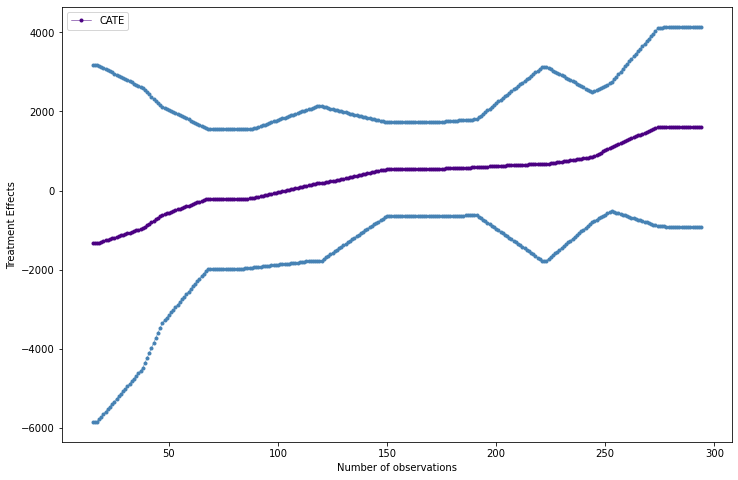

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(z['cate'],
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(z['lb'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(z['ub'],
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

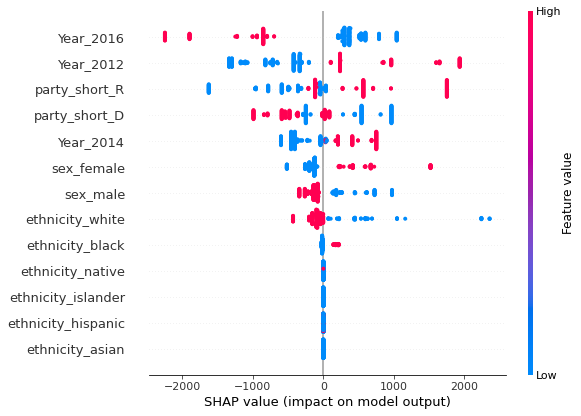

In [13]:
import shap
from econml.dml import CausalForestDML

# fit causal forest with default parameters 
causal_forest = CausalForestDML()
causal_forest.fit(Y, T, X=X, W=W)

# calculate shap values of causal forest model
shap_values = causal_forest.shap_values(X)
# plot shap values 
shap.summary_plot(shap_values['Y0']['T0'])

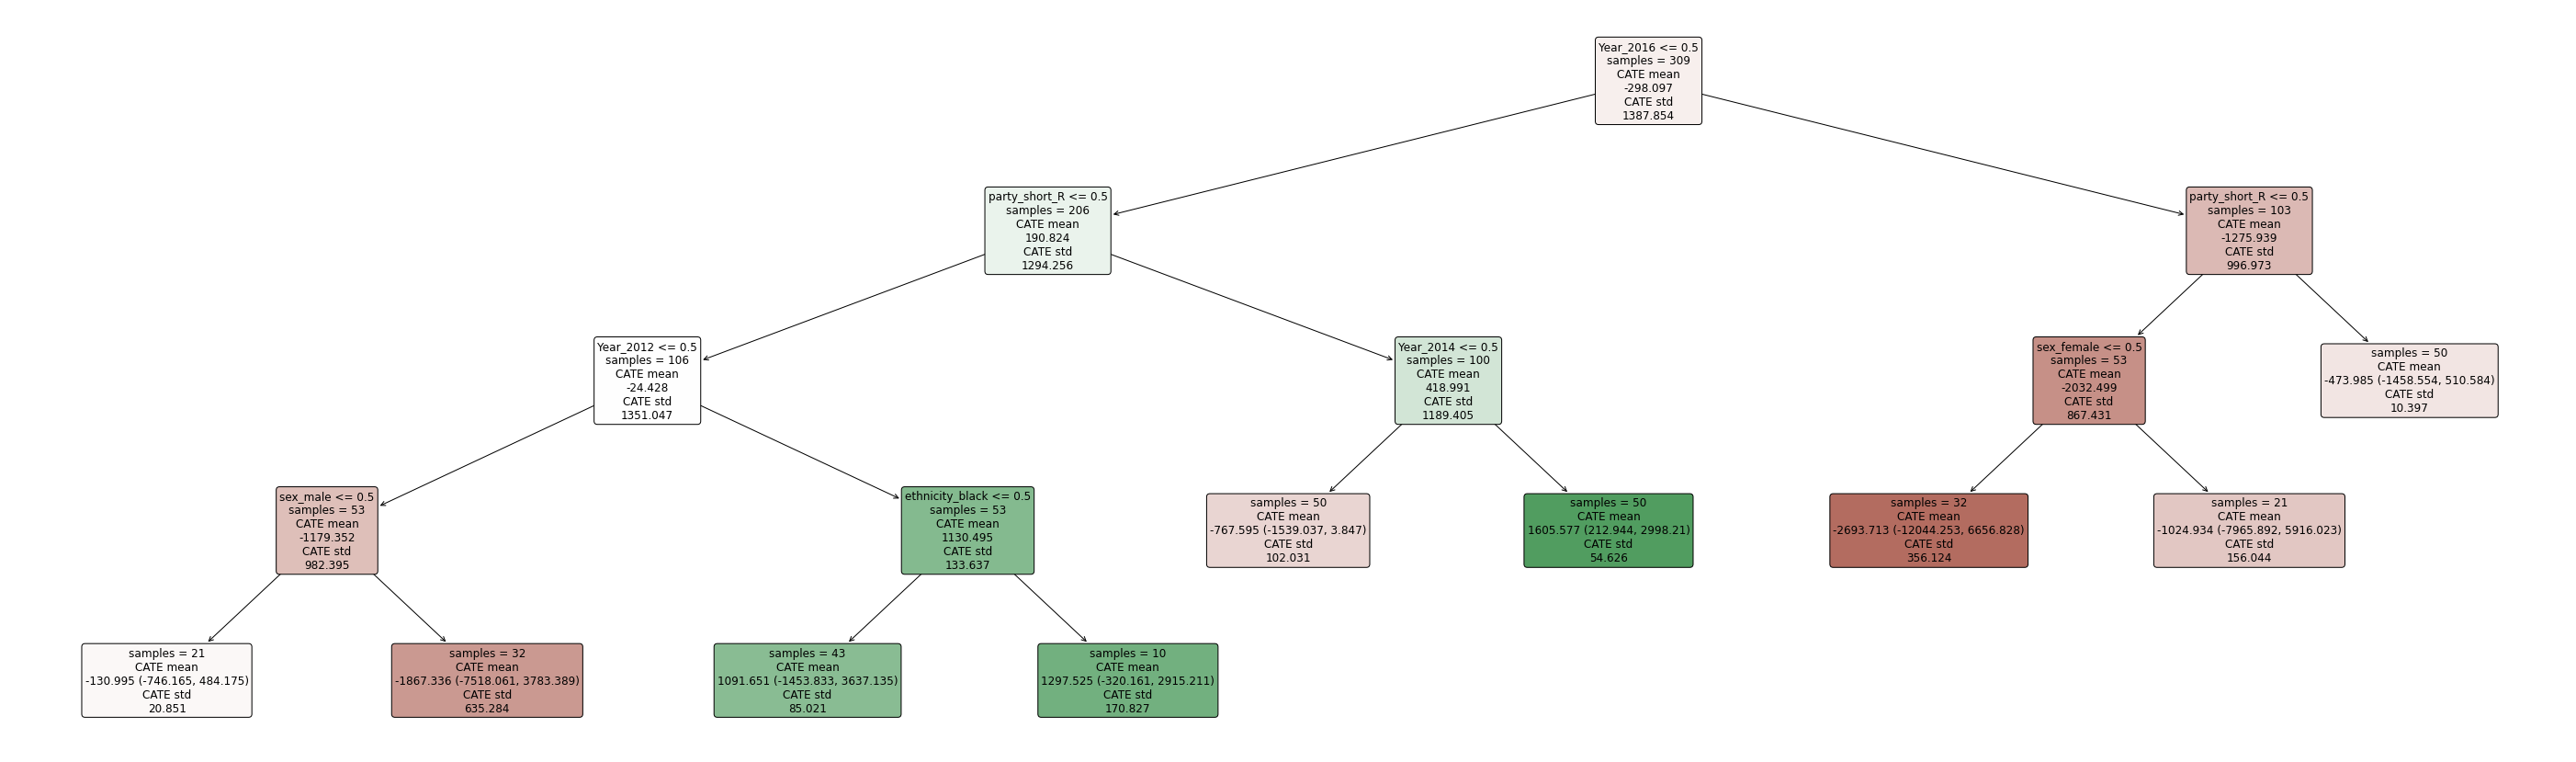

In [14]:
%matplotlib inline
from econml.cate_interpreter import SingleTreeCateInterpreter
intrp = SingleTreeCateInterpreter(include_model_uncertainty=True, max_depth=4, min_samples_leaf=10)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(causal_forest, X)
# Plot the tree
plt.figure(figsize=(50, 15))
intrp.plot(feature_names=[
 'Year_2012',
 'Year_2014',
 'Year_2016',
 'sex_female',
 'sex_male',
 'ethnicity_asian',
 'ethnicity_black',
 'ethnicity_hispanic',
 'ethnicity_islander',
 'ethnicity_native',
 'ethnicity_white',
 'party_short_D',
 'party_short_R'], fontsize=12)
plt.show()

In [15]:
causal_forest.feature_importances_



array([[0.11551888, 0.12215623, 0.20145534, 0.0248599 , 0.05330165,
        0.        , 0.06300446, 0.        , 0.        , 0.        ,
        0.04458935, 0.17714154, 0.19797266]])